# 6.5 Machine Learning Part 2

# Contents

1. Importing libraries
2. Importing data and renaming columns
3. The elbow technique
4. k-means clustering

# 1. Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 2. Importing Data

In [3]:
#Creating common folder path
path = r'C:\Users\Mukund\Desktop\Career Foundry\Covid-19 Vaccination Progress' 

In [4]:
path

'C:\\Users\\Mukund\\Desktop\\Career Foundry\\Covid-19 Vaccination Progress'

In [5]:
# Importing Corona vaccination Data
df_CVN = pd.read_csv(os.path.join(path, 'Data', 'Prepared_Data', 'Country_Vaccinations_Checked.csv'), index_col = False)

In [6]:
df_CVN.shape

(36063, 15)

In [7]:
df_CVN.head()

,Country,iso_code,Date,Total_No_Of_vaccinations,Total_No_People_Vaccinated,Total_No_Of_People_Fully_Vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,Total_No_People_Vaccinated_Per_Hundred,Total_No_OF_People_Fully_Vaccinated_Per_Hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,22/02/2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,23/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,24/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,25/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,26/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [8]:
# Renaming the column names
df_CVN.rename(columns = {'Total_No_Of_vaccinations':'Total_Vaccinations',
                        'Total_No_People_Vaccinated':'Total_Ppl_Vaccinated', 'Total_No_Of_People_Fully_Vaccinated':'Total_Ppl_Fully_Vaccinated',
                         'Total_No_People_Vaccinated_Per_Hundred':'Total_ppl_Vaccinated_Per_Hundred',
                         'Total_No_OF_People_Fully_Vaccinated_Per_Hundred':'Total_ppl_Fully_Vaccinated_Per_Hundred'
                        }, inplace = True)

In [9]:
df_CVN.columns

Index(['Country', 'iso_code', 'Date', 'Total_Vaccinations',
       'Total_Ppl_Vaccinated', 'Total_Ppl_Fully_Vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'Total_ppl_Vaccinated_Per_Hundred',
       'Total_ppl_Fully_Vaccinated_Per_Hundred',
       'daily_vaccinations_per_million', 'vaccines', 'source_name',
       'source_website'],
      dtype='object')

In [10]:
# We need to create the subset of data which contains only numeric variables
df_num = df_CVN[['Total_Vaccinations', 'Total_Ppl_Vaccinated','Total_Ppl_Fully_Vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'Total_ppl_Vaccinated_Per_Hundred',
       'Total_ppl_Fully_Vaccinated_Per_Hundred',
       'daily_vaccinations_per_million']]

In [11]:
df_num.head()

,Total_Vaccinations,Total_Ppl_Vaccinated,Total_Ppl_Fully_Vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,Total_ppl_Vaccinated_Per_Hundred,Total_ppl_Fully_Vaccinated_Per_Hundred,daily_vaccinations_per_million
0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [12]:
df_num.shape

(36063, 9)

In [13]:
df_num.isnull().sum()

Total_Vaccinations                        15995
Total_Ppl_Vaccinated                      16913
Total_Ppl_Fully_Vaccinated                19761
daily_vaccinations_raw                    19510
daily_vaccinations                          238
total_vaccinations_per_hundred            15995
Total_ppl_Vaccinated_Per_Hundred          16913
Total_ppl_Fully_Vaccinated_Per_Hundred    19761
daily_vaccinations_per_million              238
dtype: int64

In [14]:
# While setting the clusters the function is throwing error due to null values in data
# so will create subset of data and remove the null values

df_Clean = df_num[df_num['Total_Vaccinations'].notnull() & df_num['Total_Ppl_Vaccinated'].notnull()
                & df_num['Total_Ppl_Fully_Vaccinated'].notnull() & df_num['daily_vaccinations_raw'].notnull()
                & df_num['daily_vaccinations'].notnull() & df_num['total_vaccinations_per_hundred'].notnull()
                  & df_num['Total_ppl_Vaccinated_Per_Hundred'].notnull()
                & df_num['Total_ppl_Fully_Vaccinated_Per_Hundred'].notnull() & df_num['daily_vaccinations_per_million'].notnull()
                 ]

In [15]:
df_Clean.isnull().sum()

Total_Vaccinations                        0
Total_Ppl_Vaccinated                      0
Total_Ppl_Fully_Vaccinated                0
daily_vaccinations_raw                    0
daily_vaccinations                        0
total_vaccinations_per_hundred            0
Total_ppl_Vaccinated_Per_Hundred          0
Total_ppl_Fully_Vaccinated_Per_Hundred    0
daily_vaccinations_per_million            0
dtype: int64

In [16]:
df_Clean.shape

(13876, 9)

Exporting cleaned data set for clusters

In [17]:
df_Clean.to_csv(os.path.join(path, 'Data', 'Prepared_Data', 'Cluster_Cleaned_data.csv'))

In [18]:
df_Clean.head()

,Total_Vaccinations,Total_Ppl_Vaccinated,Total_Ppl_Fully_Vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,Total_ppl_Vaccinated_Per_Hundred,Total_ppl_Fully_Vaccinated_Per_Hundred,daily_vaccinations_per_million
94,593313.0,479574.0,113739.0,2859.0,6487.0,1.52,1.23,0.29,167.0
101,630305.0,481800.0,148505.0,4015.0,5285.0,1.62,1.24,0.38,136.0
200,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0
282,622507.0,440921.0,181586.0,9548.0,12160.0,21.63,15.32,6.31,4225.0
283,632676.0,444755.0,187921.0,10169.0,10870.0,21.98,15.45,6.53,3777.0


Since our data has difference in size of the variables, we need to do scaling for the same.

In [19]:
# standardizing data set 
#scaler = StandardScaler()

In [20]:
#df_clean_std = scaler.fit_transform(df_Clean)

# 3. The elbow technique

In [21]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [22]:
score = [kmeans[i].fit(df_Clean).score(df_Clean) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3.615636428945666e+19,
 -9.904351772464738e+18,
 -4.892978227980515e+18,
 -3.3851279027569495e+18,
 -2.3939973380369997e+18,
 -1.7294410744014218e+18,
 -1.4253957742917627e+18,
 -1.1255285174752502e+18,
 -9.27803482208663e+17]

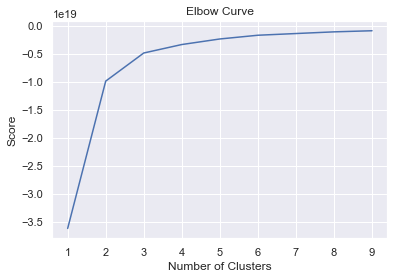

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

# 4. k-means clustering

In [24]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [25]:
# Fit the k-means object to the data.

kmeans.fit(df_Clean)

C:\Users\Mukund\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [26]:
df_Clean['clusters'] = kmeans.fit_predict(df_Clean)

C:\Users\Mukund\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-26-7004d20a6a02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Clean['clusters'] = kmeans.fit_predict(df_Clean)


In [27]:
df_Clean.head()

,Total_Vaccinations,Total_Ppl_Vaccinated,Total_Ppl_Fully_Vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,Total_ppl_Vaccinated_Per_Hundred,Total_ppl_Fully_Vaccinated_Per_Hundred,daily_vaccinations_per_million,clusters
94,593313.0,479574.0,113739.0,2859.0,6487.0,1.52,1.23,0.29,167.0,0
101,630305.0,481800.0,148505.0,4015.0,5285.0,1.62,1.24,0.38,136.0,0
200,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,0
282,622507.0,440921.0,181586.0,9548.0,12160.0,21.63,15.32,6.31,4225.0,0
283,632676.0,444755.0,187921.0,10169.0,10870.0,21.98,15.45,6.53,3777.0,0


In [28]:
# Exporting data with clusters
df_Clean.to_csv(os.path.join(path, 'Data', 'Prepared_Data', 'Data_with_clusters.csv'))

In [29]:
df_Clean['clusters'].value_counts()

0    12652
2     1031
1      193
Name: clusters, dtype: int64

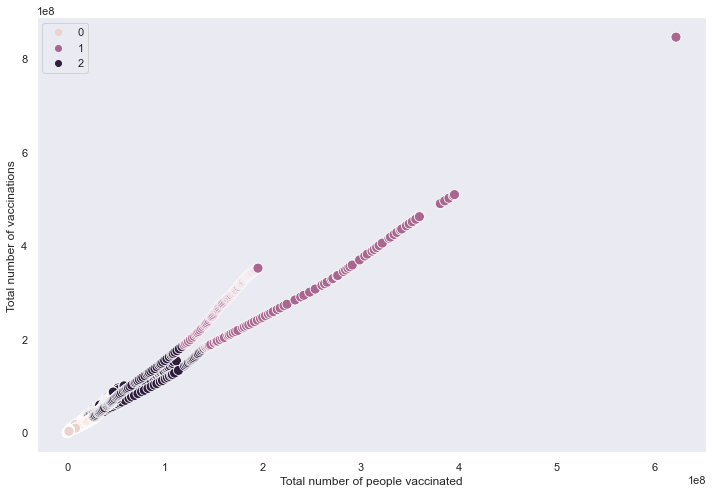

In [30]:
# Plot the clusters for the "Total_Vaccinations" and "Total_Ppl_Vaccinated" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_Clean['Total_Ppl_Vaccinated'], y=df_Clean['Total_Vaccinations'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Total number of people vaccinated')
plt.ylabel('Total number of vaccinations')
plt.show()

From the above scatterplot with 3 clusters, we can see that the pink color(coded as 0) cluster looks more cloudy as it has higher number of data points 12652 in its group and they got overlapped on each other. This cluster is having maximumn data points near the bottom of the graph indicating that most of the total vaccinations and total number of vacciated people are in the low vaccination group which we have already explored in previous task.
After that there is a dark purple color cluster data group(coded as 2) which indicates medium group of vaccinations.Then purple color cluster(coded as 1) which seems bigger visually but it has very low number of data points beacuase there are very high number of total vaccinations. From plot, its quite clear that as the number of total number of vaccinated people increases the total number of vaccinations also increases in linear proportion.

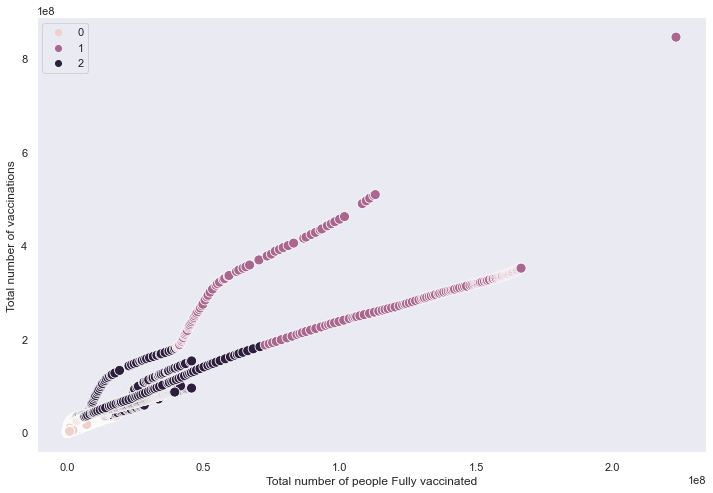

In [31]:
# Plot the clusters for the "Total_Vaccinations" and "Total_Ppl_Vaccinated" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_Clean['Total_Ppl_Fully_Vaccinated'], y=df_Clean['Total_Vaccinations'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Total number of people Fully vaccinated')
plt.ylabel('Total number of vaccinations')
plt.show()

Similarly, we have created scatterplot to check the relation between total number of fully vaccinated people and total number of vaccinations.Here the clusters distribution is same like above the only difference is that total number of people vaccinated is almost twice the number of people fully vaccinated. It is quite obvious because everone is getting the first dose easily but they have to wait atleast for one month till they get the second dose. So in between that time the first vaccine dosen't have any condition or waiting. So the total number of vaccines is always greater than fully vaccinated people.

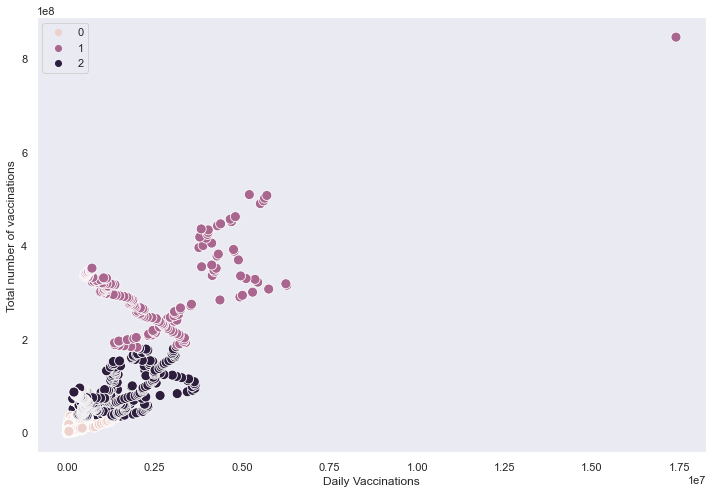

In [32]:
# Plot the clusters for the "daily_vaccinations" and "Total_Vaccinations" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_Clean['daily_vaccinations'], y=df_Clean['Total_Vaccinations'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Daily Vaccinations') 
plt.ylabel('Total number of vaccinations') 
plt.show()

The above scatterplot doesn't show any trend in the relationship between total vaccinations and daily vaccinations and points are scattered more as compared to above plots.

In [33]:
df_Clean.loc[df_Clean['clusters'] == 2, 'cluster'] = 'dark purple'
df_Clean.loc[df_Clean['clusters'] == 1, 'cluster'] = 'purple'
df_Clean.loc[df_Clean['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Mukund\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Mukund\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Mukund\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [34]:
df_Clean.groupby('cluster').agg({'Total_Vaccinations':['mean', 'median'],
    'Total_Ppl_Vaccinated':['mean', 'median'], 
                         'Total_Ppl_Fully_Vaccinated':['mean', 'median'], 
                         'daily_vaccinations':['mean', 'median']
                          })

Total_Vaccinations              Total_Ppl_Vaccinated               \
                          mean       median                 mean       median   
cluster                                                                         
dark purple       6.478476e+07   58372173.0         4.260490e+07   36946260.0   
pink              4.379986e+06    1524492.5         2.987984e+06    1029622.0   
purple            3.034789e+08  304753476.0         2.018616e+08  179940202.0   

            Total_Ppl_Fully_Vaccinated              daily_vaccinations  \
                                  mean       median               mean   
cluster                                                                  
dark purple               2.277569e+07   21555117.0       8.128190e+05   
pink                      1.407750e+06     434248.0       7.134042e+04   
purple                    1.064513e+08  108216020.0       2.427990e+06   

                        
                median  
cluster                 
dark purple   575899.0  
pink           22322.0  
purple       2017931.0

With the above statistics for different clusters, I would say pink color cluster with the two variables (total vaccinations and total number of vaccinated people) will be useful to support our hypothesis.
If you look at the medians, total vaccinated people has high value of median as compared to other variables (Total number of fully vaccinated people and daily vaccinations) in proportion with total vaccinations median. Means total number of vaccinated people has more impact on total vaccinations and if it increases the other (total vaccinations) also increase.